<a href="https://colab.research.google.com/github/AngelB26/ICTAK/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/mobile_price_classification (1).csv')

In [3]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
data.shape

(2000, 21)

In [6]:
data.dtypes

battery_power       int64
bluetooth           int64
clock_speed       float64
dual_sim            int64
front_cam           int64
4G                  int64
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
primary_camera      int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g             int64
touch_screen        int64
wifi                int64
price_range         int64
dtype: object

In [7]:
data.isna().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [8]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [9]:
x = data.drop('price_range', axis = 1)
y = data['price_range']

In [10]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
#Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x.loc[:,['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi',]] = sc.fit_transform(x[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi',]])

In [ ]:
#test train split

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state = 42)

In [ ]:
#creating a neural network based classifier

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(10,activation = 'relu'))
model.add(Dense(4,activation ='softmax'))

In [15]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'],run_eagerly=True)

In [16]:
history = model.fit(x_train,y_train,epochs = 100, verbose = 1 )

Epoch 1/100
50/50 [==============================] - 3s 33ms/step - loss: 1.5469 - accuracy: 0.2412
Epoch 2/100
50/50 [==============================] - 1s 27ms/step - loss: 1.4433 - accuracy: 0.2794
Epoch 3/100
50/50 [==============================] - 1s 27ms/step - loss: 1.3709 - accuracy: 0.3200
Epoch 4/100
50/50 [==============================] - 1s 25ms/step - loss: 1.3115 - accuracy: 0.3587
Epoch 5/100
50/50 [==============================] - 1s 26ms/step - loss: 1.2571 - accuracy: 0.4119
Epoch 6/100
50/50 [==============================] - 1s 25ms/step - loss: 1.2040 - accuracy: 0.4531
Epoch 7/100
50/50 [==============================] - 1s 26ms/step - loss: 1.1504 - accuracy: 0.4856
Epoch 8/100
50/50 [==============================] - 2s 37ms/step - loss: 1.0956 - accuracy: 0.5263
Epoch 9/100
50/50 [==============================] - 2s 35ms/step - loss: 1.0402 - accuracy: 0.5600
Epoch 10/100
50/50 [==============================] - 1s 27ms/step - loss: 0.9858 - accuracy: 0.5925

In [17]:
y_pred = model.predict(x_test)

13/13 [==============================] - 0s 5ms/step


In [18]:
y_pred

array([[9.9275362e-01, 7.2463383e-03, 1.5552648e-07, 1.0344354e-18],
       [2.5192449e-08, 5.8428593e-02, 9.4142532e-01, 1.4603985e-04],
       [2.1556299e-02, 9.7273558e-01, 5.7081245e-03, 1.0363120e-10],
       ...,
       [8.8467081e-05, 9.6306634e-01, 3.6845215e-02, 3.1754507e-08],
       [2.2853096e-04, 9.6549302e-01, 3.4278374e-02, 2.5260523e-09],
       [1.1661642e-10, 2.4260066e-03, 9.9449760e-01, 3.0764323e-03]],
      dtype=float32)

In [ ]:
#accuracy

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [21]:
accuracy_score(y_test,pred)

0.9675

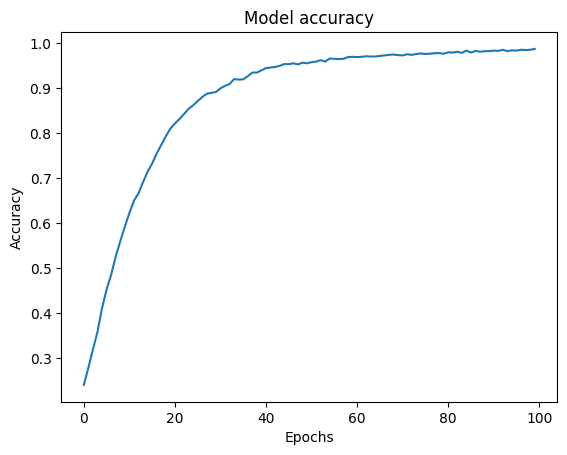

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()